---

_You are currently looking at **version 1.1** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-social-network-analysis/resources/yPcBs) course resource._

---

# Assignment 1 - Creating and Manipulating Graphs

Eight employees at a small company were asked to choose 3 movies that they would most enjoy watching for the upcoming company movie night. These choices are stored in the file `Employee_Movie_Choices.txt`.

A second file, `Employee_Relationships.txt`, has data on the relationships between different coworkers. 

The relationship score has value of `-100` (Enemies) to `+100` (Best Friends). A value of zero means the two employees haven't interacted or are indifferent.

Both files are tab delimited.

In [5]:
import networkx as nx
import pandas as pd
import numpy as np
from networkx.algorithms import bipartite


# This is the set of employees
employees = set(['Pablo',
                 'Lee',
                 'Georgia',
                 'Vincent',
                 'Andy',
                 'Frida',
                 'Joan',
                 'Claude'])

# This is the set of movies
movies = set(['The Shawshank Redemption',
              'Forrest Gump',
              'The Matrix',
              'Anaconda',
              'The Social Network',
              'The Godfather',
              'Monty Python and the Holy Grail',
              'Snakes on a Plane',
              'Kung Fu Panda',
              'The Dark Knight',
              'Mean Girls'])


# you can use the following function to plot graphs
# make sure to comment it out before submitting to the autograder
def plot_graph(G, weight_name=None):
    '''
    G: a networkx G
    weight_name: name of the attribute for plotting edge weights (if G is weighted)
    '''

    import matplotlib.pyplot as plt
    
    plt.figure()
    pos = nx.spring_layout(G)
    edges = G.edges()
    weights = None
    
    if weight_name:
        weights = [int(G[u][v][weight_name]) for u,v in edges]
        labels = nx.get_edge_attributes(G,weight_name)
        nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
        nx.draw_networkx(G, pos, edges=edges, width=weights);
    else:
        nx.draw_networkx(G, pos, edges=edges);

### Question 1

Using NetworkX, load in the bipartite graph from `Employee_Movie_Choices.txt` and return that graph.

*This function should return a networkx graph with 19 nodes and 24 edges*

[('Frida', {'bipartite': 0}), ('Lee', {'bipartite': 0}), ('Andy', {'bipartite': 0}), ('Claude', {'bipartite': 0}), ('Joan', {'bipartite': 0}), ('Vincent', {'bipartite': 0}), ('Pablo', {'bipartite': 0}), ('Georgia', {'bipartite': 0}), ('The Social Network', {'bipartite': 1}), ('Mean Girls', {'bipartite': 1}), ('The Matrix', {'bipartite': 1}), ('Forrest Gump', {'bipartite': 1}), ('Snakes on a Plane', {'bipartite': 1}), ('The Godfather', {'bipartite': 1}), ('The Dark Knight', {'bipartite': 1}), ('Kung Fu Panda', {'bipartite': 1}), ('Monty Python and the Holy Grail', {'bipartite': 1}), ('Anaconda', {'bipartite': 1}), ('The Shawshank Redemption', {'bipartite': 1})]


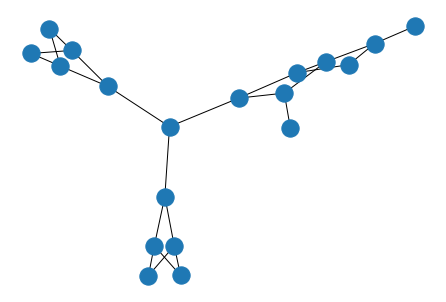

In [39]:
def answer_one():
         
    G = nx.Graph() 
    movie_prefs = pd.read_csv("Employee_Movie_Choices.txt", delimiter = '\t')
    #create networkX graph instance and read in the .txt file
    
    Employee_set = set(movie_prefs['#Employee'])
    Movie_set = set(movie_prefs['Movie'])
    #create a set of employees and movies
    
    G.add_nodes_from(Employee_set, bipartite=0)
    G.add_nodes_from(Movie_set, bipartite=1)
    #add movie and employees nodes to the graph, make the graph bipartite
    
    Employee_Movie_edges = list(zip(movie_prefs['#Employee'],movie_prefs['Movie']))
    G.add_edges_from(Employee_Movie_edges)
    #add edges to the graph per the employee preferences in the .txt file
    
    print(G.nodes(data=True))
    nx.draw(G)
    return G
answer_one()

### Question 2

Using the graph from the previous question, add nodes attributes named `'type'` where movies have the value `'movie'` and employees have the value `'employee'` and return that graph.

*This function should return a networkx graph with node attributes `{'type': 'movie'}` or `{'type': 'employee'}`*

[('Frida', {'bipartite': 0, 'type': 'employee'}), ('Lee', {'bipartite': 0, 'type': 'employee'}), ('Andy', {'bipartite': 0, 'type': 'employee'}), ('Claude', {'bipartite': 0, 'type': 'employee'}), ('Joan', {'bipartite': 0, 'type': 'employee'}), ('Vincent', {'bipartite': 0, 'type': 'employee'}), ('Pablo', {'bipartite': 0, 'type': 'employee'}), ('Georgia', {'bipartite': 0, 'type': 'employee'}), ('The Social Network', {'bipartite': 1, 'type': 'movie'}), ('Mean Girls', {'bipartite': 1, 'type': 'movie'}), ('The Matrix', {'bipartite': 1, 'type': 'movie'}), ('Forrest Gump', {'bipartite': 1, 'type': 'movie'}), ('Snakes on a Plane', {'bipartite': 1, 'type': 'movie'}), ('The Godfather', {'bipartite': 1, 'type': 'movie'}), ('The Dark Knight', {'bipartite': 1, 'type': 'movie'}), ('Kung Fu Panda', {'bipartite': 1, 'type': 'movie'}), ('Monty Python and the Holy Grail', {'bipartite': 1, 'type': 'movie'}), ('Anaconda', {'bipartite': 1, 'type': 'movie'}), ('The Shawshank Redemption', {'bipartite': 1, 'ty

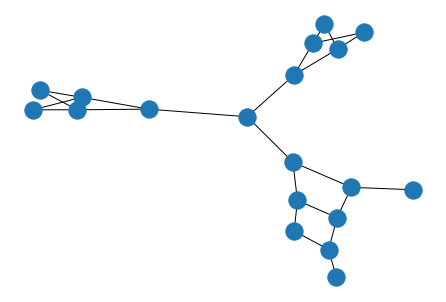

In [38]:
def answer_two():
    
    G = nx.Graph()
    movie_prefs = pd.read_csv("Employee_Movie_Choices.txt", delimiter = '\t')
    #create networkX graph instance and read in the .txt file
    
    Employee_set = set(movie_prefs['#Employee'])
    Movie_set = set(movie_prefs['Movie'])
    #create a set of employees and movies
    
    G.add_nodes_from(Employee_set, bipartite=0, type = 'employee')
    G.add_nodes_from(Movie_set, bipartite=1, type = 'movie')
    #add movie and employees nodes to the graph, make the graph bipartite, add a node attribute types  
    
    Employee_Movie_edges = list(zip(movie_prefs['#Employee'],movie_prefs['Movie']))
    G.add_edges_from(Employee_Movie_edges)
    #add edges to the graph per the employee preferences in the .txt file
    
    print(G.nodes(data=True))
    nx.draw(G)
    return G
answer_two()

### Question 3

Find a weighted projection of the graph from `answer_two` which tells us how many movies different pairs of employees have in common.

*This function should return a weighted projected graph.*

[('Frida', 'Vincent', {'weight': 2}), ('Frida', 'Andy', {'weight': 1}), ('Frida', 'Pablo', {'weight': 2}), ('Lee', 'Joan', {'weight': 3}), ('Lee', 'Andy', {'weight': 1}), ('Andy', 'Claude', {'weight': 1}), ('Andy', 'Joan', {'weight': 1}), ('Andy', 'Pablo', {'weight': 1}), ('Andy', 'Georgia', {'weight': 1}), ('Claude', 'Georgia', {'weight': 3}), ('Vincent', 'Pablo', {'weight': 1})]


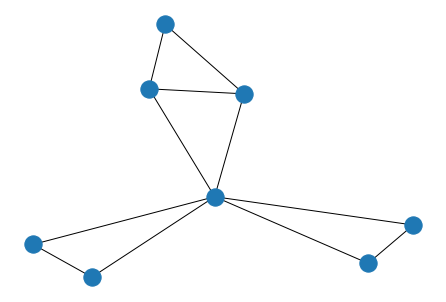

In [37]:
from networkx.algorithms import bipartite

def answer_three():
        
    G = nx.Graph()
    movie_prefs = pd.read_csv("Employee_Movie_Choices.txt", delimiter = '\t')
    #create networkX graph instance and read in the .txt file    
    
    Employee_set = set(movie_prefs['#Employee'])
    Movie_set = set(movie_prefs['Movie'])
    #create a set of employees and movies
    
    G.add_nodes_from(Employee_set, bipartite=0, type = 'employee')
    G.add_nodes_from(Movie_set, bipartite=1, type = 'movie')
    #add movie and employees nodes to the graph, make the graph bipartite, add a node attribute types
    
    Employee_Movie_edges = list(zip(movie_prefs['#Employee'],movie_prefs['Movie']))    
    G.add_edges_from(Employee_Movie_edges)
    #add edges to the graph per the employee preferences in the .txt file
        
    P = bipartite.weighted_projected_graph(G,Employee_set)
    #created weight projected graph. Weight is the number of movies each pair of employees has in common
    
    print(P.edges(data=True))
    nx.draw(P)
    return P

answer_three()

### Question 4

Suppose you'd like to find out if people that have a high relationship score also like the same types of movies.

Find the Pearson correlation ( using `DataFrame.corr()` ) between employee relationship scores and the number of movies they have in common. If two employees have no movies in common it should be treated as a 0, not a missing value, and should be included in the correlation calculation.

*This function should return a float.*

In [36]:
import pandas as pd
#new version of networkX does not have from_pandas_dataframe
def answer_four():
    
    employee_relationships = pd.read_csv('Employee_Relationships.txt', delimiter = '\t', header=None)
    employee_movie_choices = pd.read_csv('Employee_Movie_Choices.txt', delimiter = '\t')
    
    employee_set = set(employee_movie_choices['#Employee'])
    movie_set = set(employee_movie_choices['Movie'])
     
    G = nx.Graph()
    G.add_nodes_from(employee_set, bipartite=0)
    G.add_nodes_from(movie_set, bipartite=1)
    employee_movie_edges = list(zip(employee_movie_choices['#Employee'],employee_movie_choices['Movie']))
    G.add_edges_from(employee_movie_edges)
    P = bipartite.weighted_projected_graph(G,employee_set)
    
    G1 = nx.from_pandas_dataframe(employee_relationships,0,1,edge_attr =2)
    G1.add_edges_from(P.edges(data=True))
        
    df = pd.DataFrame(G1.edges(data=True))
    column_to_delineate = list(df[2])
    relationship_score_column = []
    movies_in_common_column = []
    for i,row in enumerate(column_to_delineate):
        relationship_score_column.append(row[2])
        try:
            movies_in_common_column.append(row['weight'])
        except:
            movies_in_common_column.append(0)
    
    df2 = pd.DataFrame()
    df2['relationship_score'] = relationship_score_column
    df2['movies_in_common'] = movies_in_common_column
    
    answer = df2.corr().iloc[0][1]
       
    return answer
answer_four()

ValueError: DataFrame constructor not properly called!